In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

In [13]:
x1, y1 = make_blobs(n_samples = 50, centers = [[4, 4], [-2, -1], [1, 1], [10, 4]], cluster_std = 0.9)

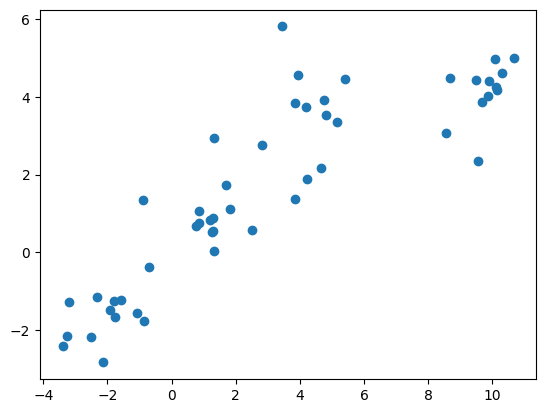

In [14]:
plt.scatter(x1[:, 0], x1[:, 1], marker = 'o')

In [15]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [16]:
agglom.fit(x1, y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

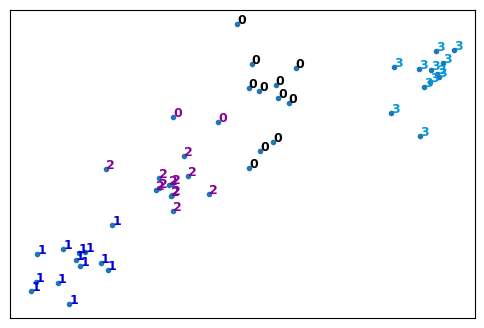

In [17]:
plt.figure(figsize = (6, 4))

x_min, x_max = np.min(x1, axis = 0), np.max(x1, axis = 0)

x1 = (x1 - x_min) / (x_max - x_min)

for i in range(x1.shape[0]):
    plt.text(x1[i, 0], x1[i, 1], str(y1[i]),
             color = plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict = {'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
      
plt.scatter(x1[:, 0], x1[:, 1], marker = '.')
plt.show()


In [18]:
distMatrix = distance_matrix(x1, x1)
print(distMatrix)

[[0.         0.84616837 0.55676501 ... 0.38368115 0.17533024 0.76863456]
 [0.84616837 0.         0.30758947 ... 0.46292236 0.90134696 0.07789625]
 [0.55676501 0.30758947 0.         ... 0.1934427  0.64208158 0.23662892]
 ...
 [0.38368115 0.46292236 0.1934427  ... 0.         0.45066293 0.38521053]
 [0.17533024 0.90134696 0.64208158 ... 0.45066293 0.         0.82386717]
 [0.76863456 0.07789625 0.23662892 ... 0.38521053 0.82386717 0.        ]]


In [19]:
z = hierarchy.linkage(distMatrix, 'complete')

C:\Users\Fatemeh\AppData\Local\Temp\ipykernel_14640\3297570472.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(distMatrix, 'complete')


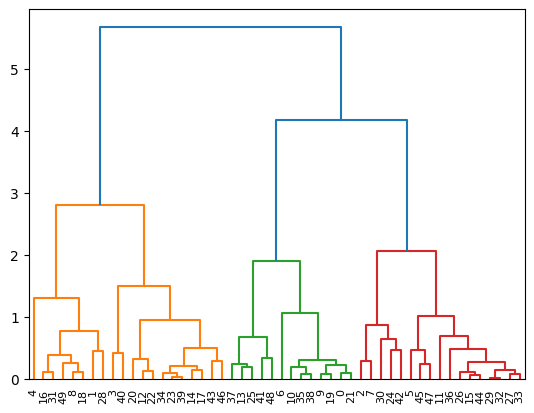

In [20]:
dendo = hierarchy.dendrogram(z)

In [21]:
z1 = hierarchy.average(distMatrix)

c:\Users\Fatemeh\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\cluster\hierarchy.py:445: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


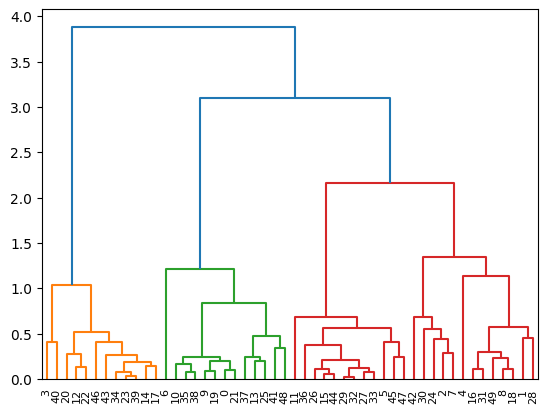

In [22]:
dendoAve = hierarchy.dendrogram(z1)